In [1]:
#Import all necessary packages
from __future__ import division, print_function, unicode_literals
import pandas as pd
import numpy as np
import os
from io import StringIO
import sys
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
sns.set(color_codes=True)
from scipy import stats

# Seed the generatpr to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)



def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

In [2]:
# import the dataset
hw = pd.read_excel('hwq3.xlsx')
# drop the missing values
hwclean = hw.dropna(axis = 0)
# recheck for missing values
hwclean.isnull().sum()


Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

Training and Visualizing Decision Tree 

In [3]:
#Define x and y and retrive attributes
x = hwclean.iloc[:,1:10]
y = hwclean.iloc[:,10]

In [4]:
# Exploring Target Variable
unique, counts = np.unique(y, return_counts=True)
print("The frequency of instances per class is: " , dict(zip(unique, counts)))
print("The names of the two distinct classes are: ", list(unique)) 

The frequency of instances per class is:  {2: 444, 4: 239}
The names of the two distinct classes are:  [2, 4]


In [5]:
# Decision Tree Induction (Fitting the Model)
tree_clf = DecisionTreeClassifier(max_depth=6, criterion='entropy', random_state=42)
tree_clf.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [6]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pip
pip.main(['install', 'graphviz'])

0

In [7]:
#replace all 2 and 4 in y column with 0 and 1 for later use in the roc curve
#get the names of attributes and target variable
columns = hw.columns.get_values()
attributes = columns[:10]
y = y.replace([2,4],[0,1])
target = y.replace([0,1],['benign','malignant']).unique()


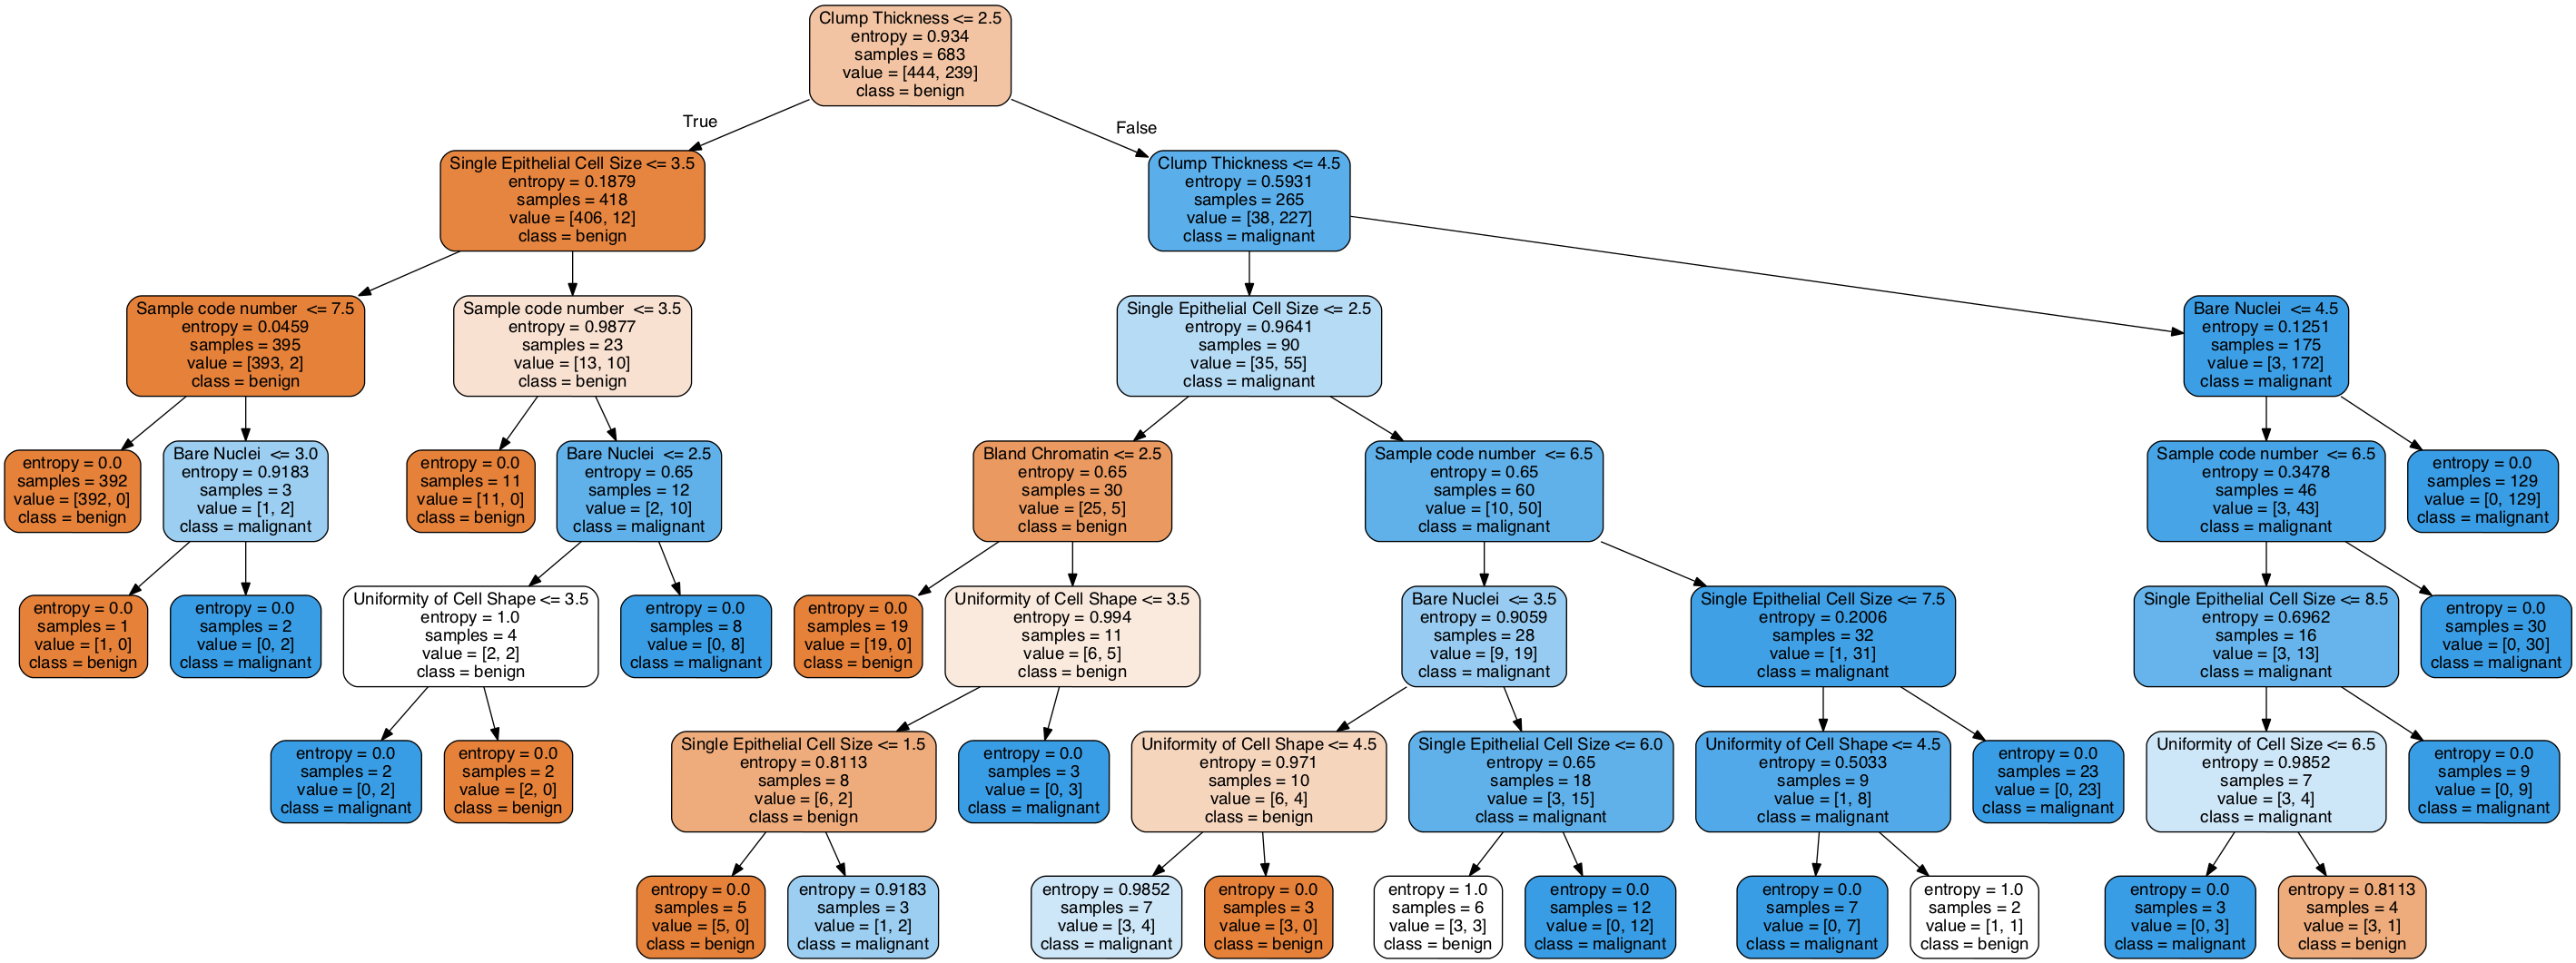

In [8]:
#visualize the trained Decision Tree by using the export_graphviz()
export_graphviz(
        tree_clf,
        out_file=image_path("hwclean_decisiontree.dot"),
        feature_names=attributes,
        class_names=target,
        rounded=True,
        filled=True
)

#find the file that is converted from .dot to .png
#print the decision tree
path_png = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, "hwclean_decisiontree.png")
Image(path_png)

In [9]:
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import graphviz 
from sklearn import tree

In [10]:
# Split the data into a training set and a test set
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
#Build the decision tree
clf2 = tree.DecisionTreeClassifier()
y_pred = clf2.fit(x_train, y_train).predict(x_test)

In [11]:
# Function that prints and plots the confusion matrix.
# Normalization can be applied
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[105   2]
 [  6  58]]
Normalized confusion matrix
[[ 0.98  0.02]
 [ 0.09  0.91]]


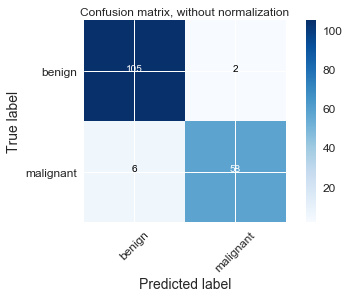

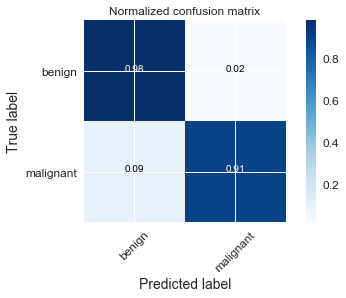

In [12]:
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

    
cnf_matrix = confusion_matrix(y_test, y_pred)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target,
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [13]:
#performance peremeters:
#Accuracy
from sklearn.metrics import accuracy_score
TreeAcc =accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
print("The accuracy of the tree is:", TreeAcc)

#precision for positive & negative
Prepos = 105/(105+6)
Prepos
Preneg = 58/(58+2)
Preneg
print("The positive precision is:", Prepos, "and the negative precision is:", Preneg)

#Recall for positive and negative
Repos = 105/(105+2)
Repos
Reneg = 58/(58+6)
Reneg
print("The positive recall is:", Repos, "and the negative recall is:", Reneg)

#F1
Fpos = 2*(Prepos*Repos)/(Prepos+Repos)
Fpos
Fneg = 2*(Preneg*Reneg)/(Preneg+Reneg)
Fneg
print("The postive fmeasure is:", Fpos, "and the negative fmeasure is:", Fneg)

The accuracy of the tree is: 0.953216374269
The positive precision is: 0.9459459459459459 and the negative precision is: 0.9666666666666667
The positive recall is: 0.9813084112149533 and the negative recall is: 0.90625
The postive fmeasure is: 0.963302752293578 and the negative fmeasure is: 0.9354838709677419


K-NN Model

In [14]:
# To write a Python 2/3 compatible codebase, the first step is to add this line to the top of each module
from __future__ import division, print_function, unicode_literals

# The simplest possible classifier is the nearest neighbor: given a new observation X_test, find in the training set (i.e.
# the data used to train the estimator) the observation(s) with the closest feature vector.

# Import necessary libraries and specify that graphs should be plotted inline.
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets


In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=1, stratify=y)
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [444 239]
Labels counts in y_train: [311 167]
Labels counts in y_test: [133  72]


In [16]:
#since all of the attributes are ranging from 1 - 10, I choose not to standardize
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets

knn3 = neighbors.KNeighborsClassifier(n_neighbors=3, 
                           p=2, 
                           metric='minkowski') #The default metric is minkowski, which is a generalization of the Euclidean distance
                                               # with p=2 is equivalent to the standard Euclidean distance.
knn3 = knn3.fit(x_train, y_train)# with p=1 is equivalent to the Mahattan distance.

knn7 = neighbors.KNeighborsClassifier(n_neighbors=7, 
                           p=2, 
                           metric='minkowski') 
knn7 = knn7.fit(x_train, y_train) 


In [17]:
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report
# for k = 3, estimate the predicted values by applying the kNN algorithm
y_pred = knn3.predict(x_test)
y_pred_insample = knn3.predict(x_train)

# Accuracy
print('Accuracy (out-of-sample): %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy (in-sample): %.2f' % accuracy_score(y_train, y_pred_insample))

# F1 score
print('F1 score (out-of-sample): ', f1_score(y_test, y_pred, average='macro'))
print('F1 score (in-sample)    : ', f1_score(y_train, y_pred_insample, average='macro'))

# Kappa score
print('Kappa score (out-of-sample): ', cohen_kappa_score(y_test, y_pred))
print('Kappa score (in-sample)    : ', cohen_kappa_score(y_train, y_pred_insample))

# Build a text report showing the main classification metrics (out-of-sample performance)
print(classification_report(y_test, y_pred, target_names= target))



Accuracy (out-of-sample): 0.96
Accuracy (in-sample): 0.99
F1 score (out-of-sample):  0.957184628237
F1 score (in-sample)    :  0.988542830161
Kappa score (out-of-sample):  0.914369256475
Kappa score (in-sample)    :  0.977086648898
             precision    recall  f1-score   support

     benign       0.97      0.97      0.97       133
  malignant       0.94      0.94      0.94        72

avg / total       0.96      0.96      0.96       205



Confusion matrix, without normalization
[[129   4]
 [  4  68]]
Normalized confusion matrix
[[ 0.97  0.03]
 [ 0.06  0.94]]


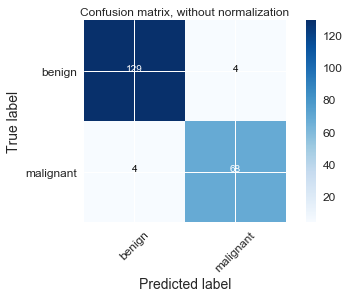

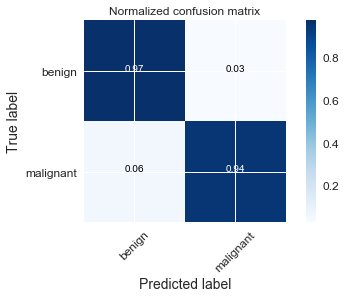

In [18]:
#Plot the confusion matrix for the 3-nn model
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

    
cnf_matrix = confusion_matrix(y_test, y_pred)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target,
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target, normalize=True,
                      title='Normalized confusion matrix')

plt.show()   

In [19]:
 from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report
# for k = 7, estimate the predicted values by applying the kNN algorithm
y_pred7 = knn7.predict(x_test)
y_pred7_insample = knn7.predict(x_train)

# Accuracy
print('Accuracy (out-of-sample): %.2f' % accuracy_score(y_test, y_pred7))
print('Accuracy (in-sample): %.2f' % accuracy_score(y_train, y_pred7_insample))

# F1 score
print('F1 score (out-of-sample): ', f1_score(y_test, y_pred7, average='macro'))
print('F1 score (in-sample)    : ', f1_score(y_train, y_pred7_insample, average='macro'))

# Kappa score
print('Kappa score (out-of-sample): ', cohen_kappa_score(y_test, y_pred7))
print('Kappa score (in-sample)    : ', cohen_kappa_score(y_train, y_pred7_insample))

# Build a text report showing the main classification metrics (out-of-sample performance)
print(classification_report(y_test, y_pred7, target_names= target))

Accuracy (out-of-sample): 0.96
Accuracy (in-sample): 0.98
F1 score (out-of-sample):  0.957184628237
F1 score (in-sample)    :  0.979263372522
Kappa score (out-of-sample):  0.914369256475
Kappa score (in-sample)    :  0.958526944953
             precision    recall  f1-score   support

     benign       0.97      0.97      0.97       133
  malignant       0.94      0.94      0.94        72

avg / total       0.96      0.96      0.96       205



Confusion matrix, without normalization
[[129   4]
 [  4  68]]
Normalized confusion matrix
[[ 0.97  0.03]
 [ 0.06  0.94]]


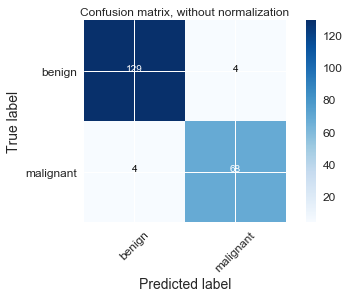

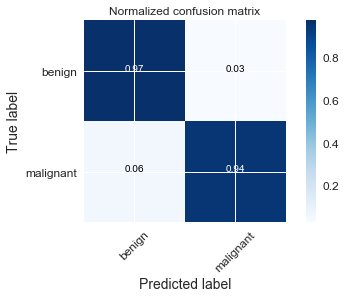

In [20]:
#Plot the confusion matrix for the 7-nn model
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    cnf_matrix = confusion_matrix(y_test, y_pred7)
np.set_printoptions(precision=2)

    
cnf_matrix = confusion_matrix(y_test, y_pred7)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target,
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Logistic Regression

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn import linear_model

# Split validation
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.4, random_state=1, stratify=y)

# We create an instance of the Classifier
# Logistic Regression (aka logit, MaxEnt) classifier.
clfl = linear_model.LogisticRegression(C=1e5)

# Train the model (fit the data)
# As with other classifiers, DecisionTreeClassifier takes as input two arrays: an array X, sparse or dense, 
# of size [n_samples, n_features] holding the training samples, and an array Y of integer values, size [n_samples], 
# holding the class labels for the training samples:
clfl = clfl.fit(x_train, y_train)
y_pred = clfl.predict(x_test)
# The underlying C implementation uses a random number generator to select features when fitting the model.
# It is thus not uncommon, to have slightly different results for the same input data. If that happens, try with a
# smaller tol parameter.

print('The weights of the attributes are:', clfl.coef_)

# Build a text report showing the main classification metrics (out-of-sample performance)
print(classification_report(y_test, y_pred, target_names=target))

NameError: name 'x' is not defined

Plotting the ROC

10-fold cross validation:

ROC AUC: 0.95 (+/- 0.03) [Decision tree]
ROC AUC: 0.99 (+/- 0.02) [3NN]
ROC AUC: 0.99 (+/- 0.02) [7NN]
ROC AUC: 1.00 (+/- 0.01) [Logistic regression]


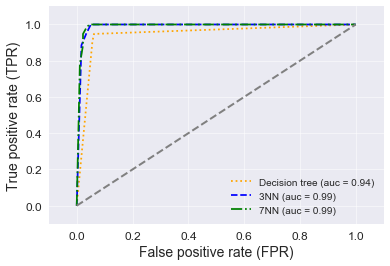

In [22]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score


clf_labels = ['Decision tree','3NN', '7NN','Logistic regression']
all_clf = [tree_clf, knn3, knn7, clfl]

print('10-fold cross validation:\n')
for clf, label in zip([tree_clf, knn3, knn7, clfl], clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=x_train,
                             y=y_train,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

colors = [ 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']
for clf, label, clr, ls in zip(all_clf,
               clf_labels, colors, linestyles):

    # assuming the label of the positive class is 1
    y_pred = clf.fit(x_train,
                     y_train).predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr,
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')


#plt.savefig('ROC_all_classifiers', dpi=300)
plt.show()

Learning Curve for Logistic regression

In [23]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    # see the performance based on the size of the data

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

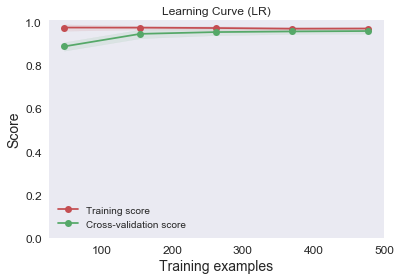

In [24]:

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
import matplotlib.pyplot as plt


title = "Learning Curve (LR)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
estimator = LogisticRegression()
plot_learning_curve(estimator, title, x, y, (0.0, 1.01), cv=cv, n_jobs=4)

plt.show()

